<a href="https://colab.research.google.com/github/khushi-joshi-05/customer_churn_prediction/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding the Data

In [ ]:
print(df.shape)

(7043, 21)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Checking and working with null values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [ ]:
df.dropna(inplace=True)
print("Missing values handled. New shape of dataset:", df.shape)


Missing values handled. New shape of dataset: (7043, 21)


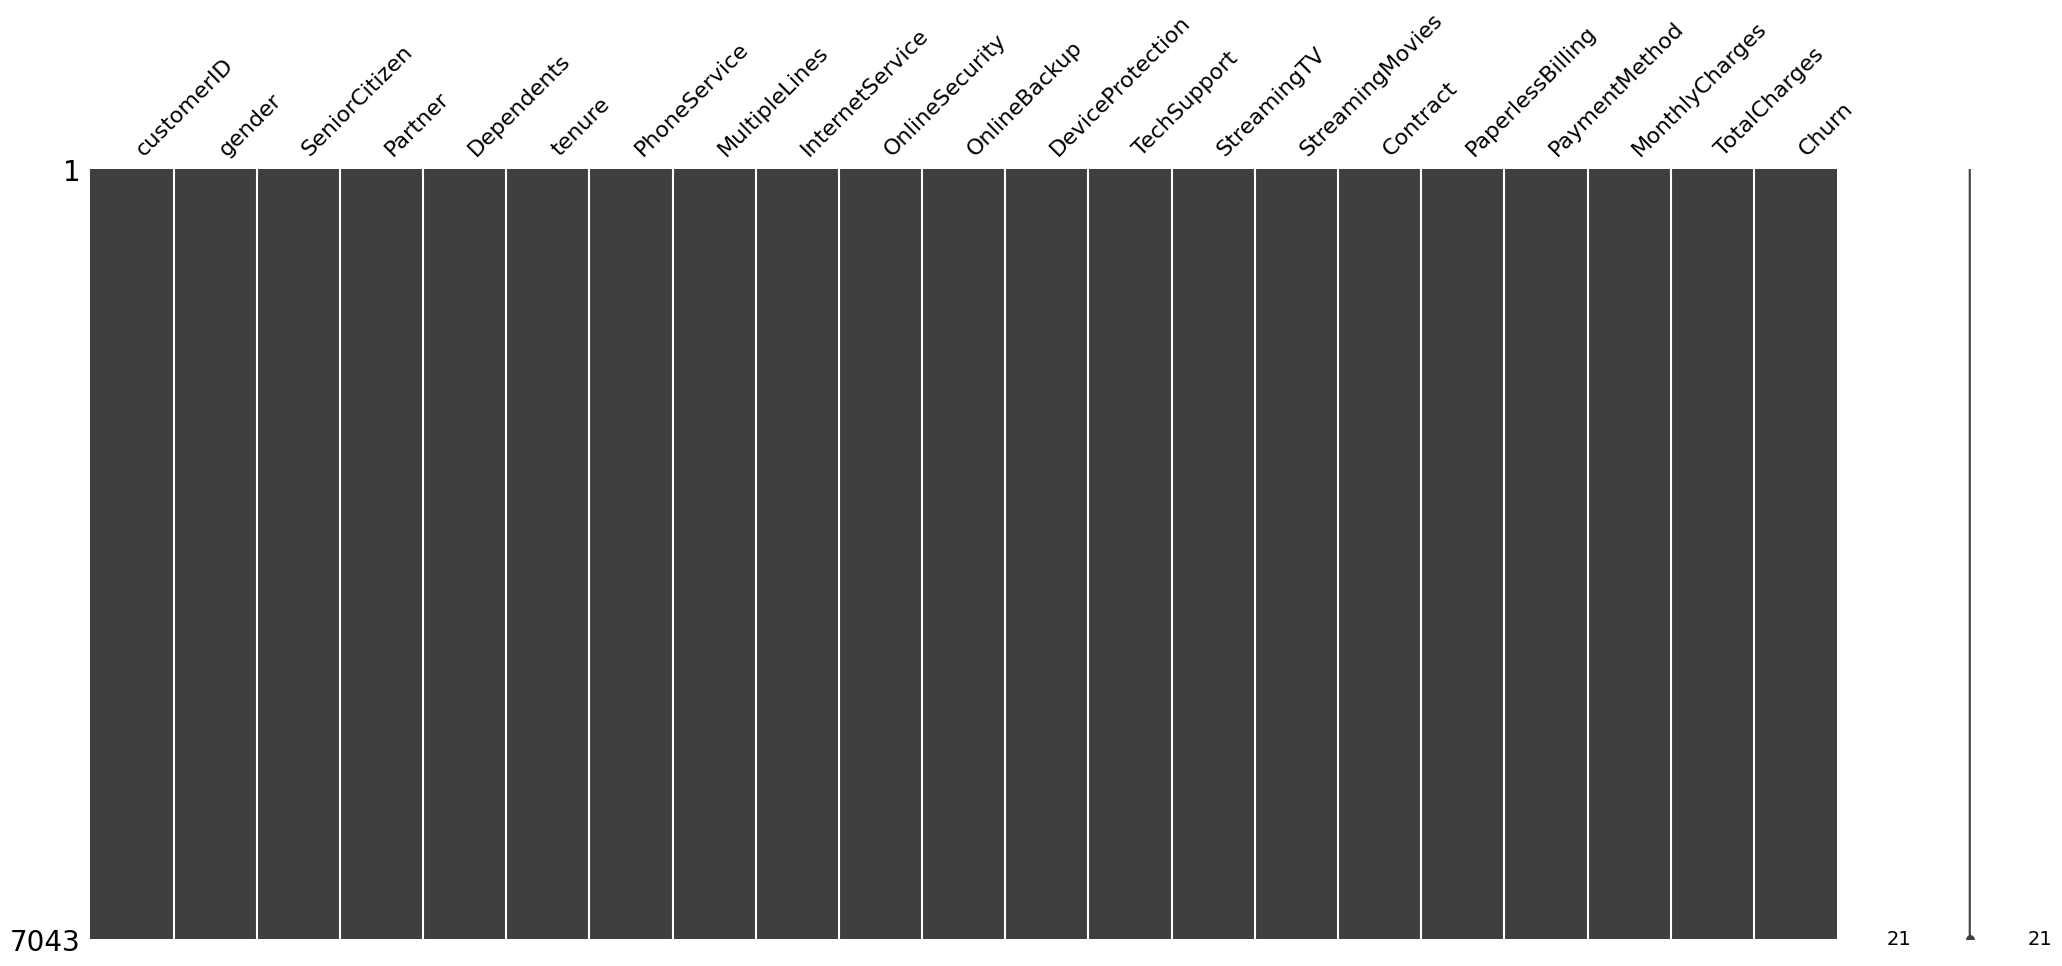

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

Data visualisation

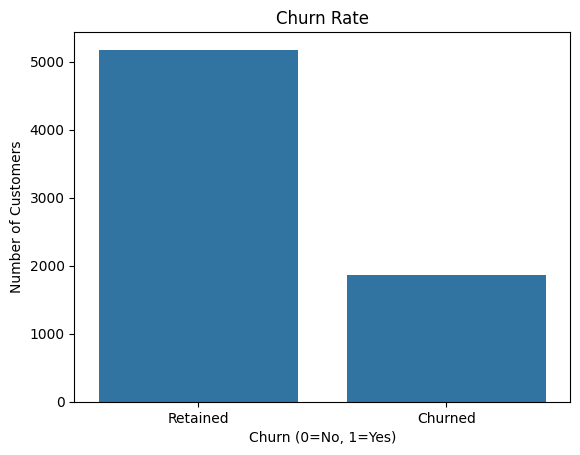

In [ ]:
#A simple bar chart comparing the count or percentage of churned customers to retained customers.
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Rate')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])
plt.show()


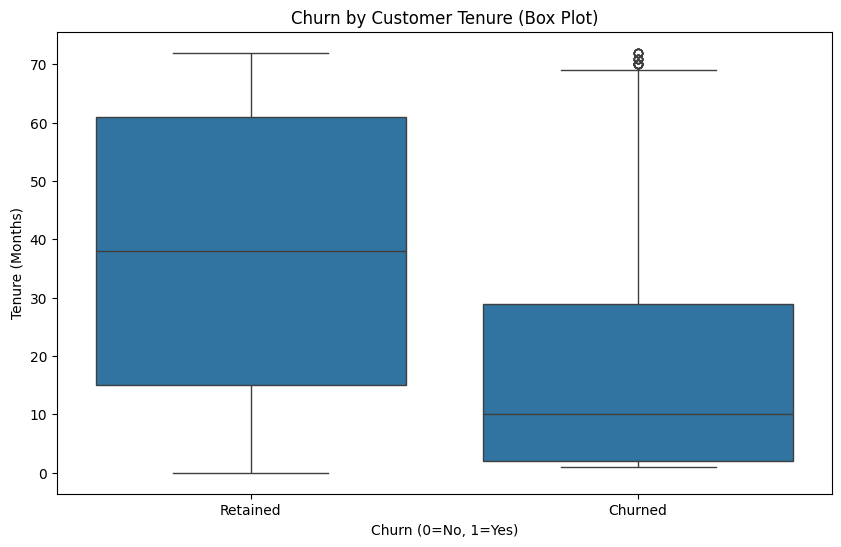

In [ ]:
# A box plot or violin plot showing churn rates across different tenure groups.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)  # Churn on x-axis and tenure on y-axis
plt.title('Churn by Customer Tenure (Box Plot)')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Tenure (Months)')
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])
plt.show()


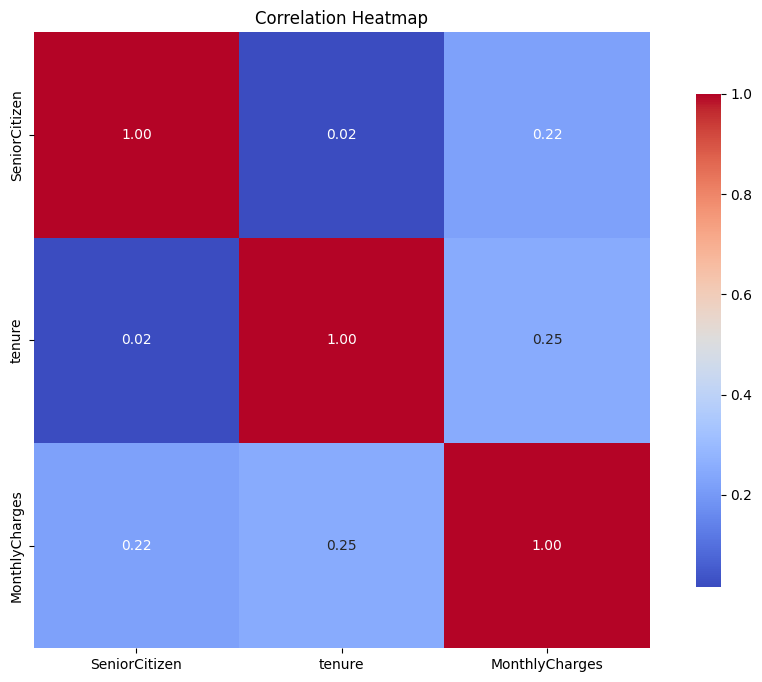

In [ ]:
#A heatmap showing correlations among numerical features in the dataset, highlighting features most related to churn.

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


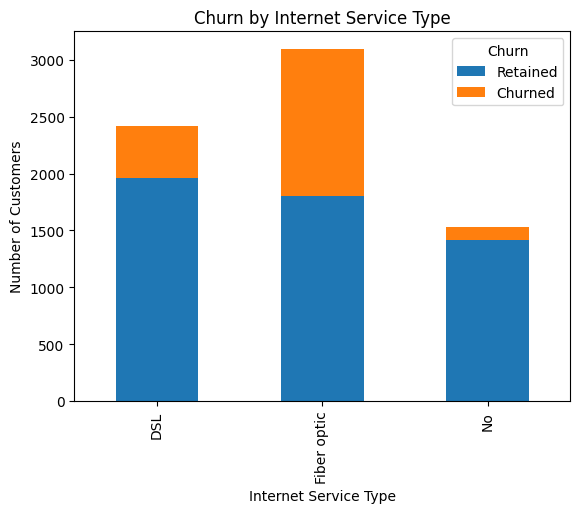

In [ ]:
#A stacked bar chart illustrating the churn rates for different services.
service_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
service_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()


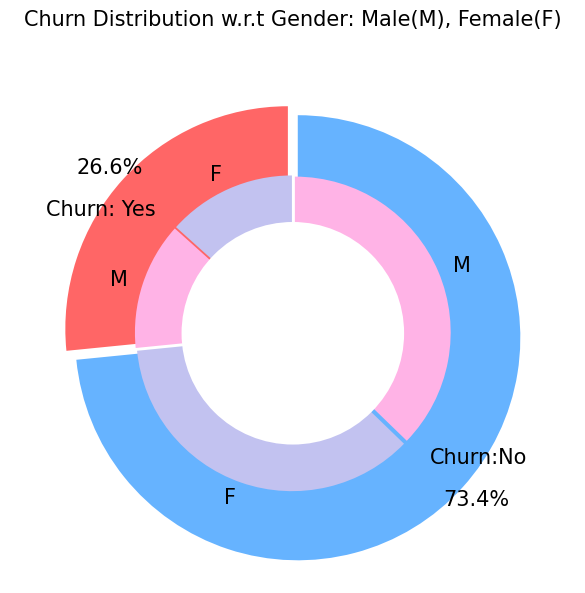

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

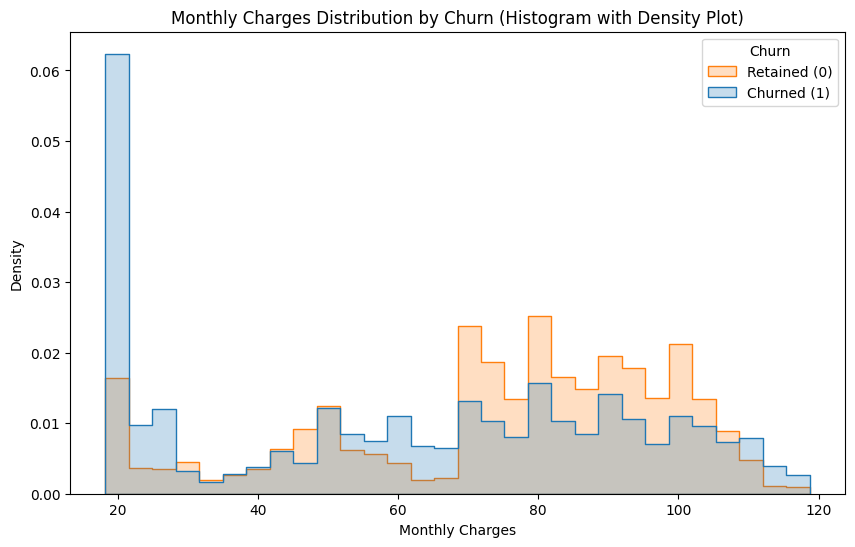

In [ ]:
#To analyze how monthly charges relate to churn.
plt.figure(figsize=(10, 6))
sns.histplot(df, x='MonthlyCharges', hue='Churn', element='step', stat='density', common_norm=False, bins=30)
plt.title('Monthly Charges Distribution by Churn (Histogram with Density Plot)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Retained (0)', 'Churned (1)'])
plt.show()


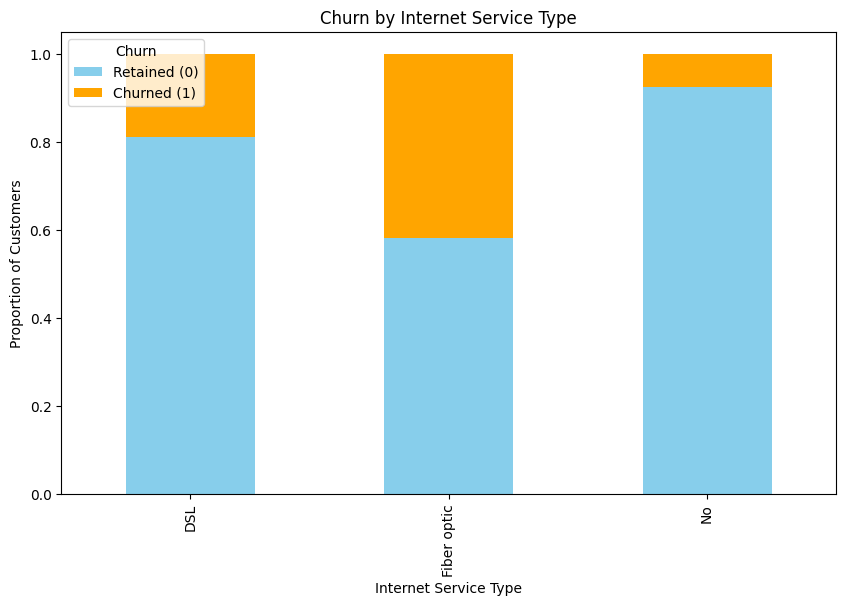

In [ ]:
#This shows how different internet service types impact churn.
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Proportion of Customers')
plt.legend(title='Churn', labels=['Retained (0)', 'Churned (1)'])
plt.show()



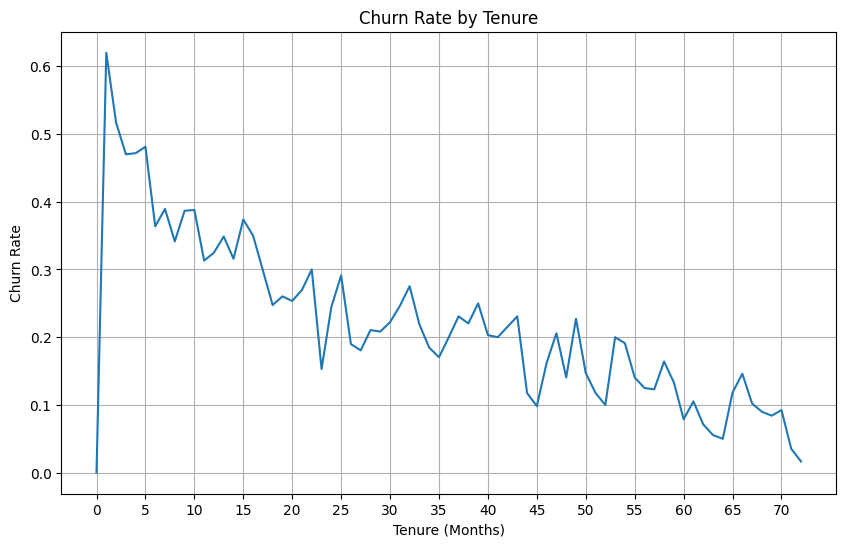

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'Churn' column to numeric
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

churn_rate_by_tenure = df.groupby('tenure')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_rate_by_tenure, x='tenure', y='Churn')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.xticks(ticks=range(0, df['tenure'].max() + 1, 5))
plt.grid()
plt.show()

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [ ]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


**Feature Engineering**

1. Encoding Categorical Features (One-Hot Encoding):

In [ ]:
#No need for one-hot encoding since the data is already encoded

2. Feature Creation

In [ ]:
# Assuming 'tenure' is in months and you have a relevant 'service_types' column
# df['TotalInteractionTime'] = df['tenure'] * df['service_types']  # Adjust 'service_types' if needed
# This block is commented out as it depends on the 'service_types' column,
# which may need adjustments based on your specific data.

3. Feature Scaling (Standardization):

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List of numerical features that require scaling
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Choose either StandardScaler or MinMaxScaler based on your requirements.

# Option 1: Standardization
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical features
scaled_data = scaler.fit_transform(df[numerical_features])

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=df.index)

# Replace the original numerical features with the scaled ones
df[numerical_features] = scaled_df

# Now `df` is ready for Logistic Regression.


**Model Training**

1. Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Encoding categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                          'MultipleLines', 'InternetService', 'OnlineSecurity',
                                          'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                          'StreamingTV', 'StreamingMovies', 'Contract',
                                          'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['customerID', 'Churn'])  # Drop unnecessary columns
y = df_encoded['Churn']  # Encode target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8211497515968772
Confusion Matrix:
 [[934 102]
 [150 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [ ]:
# Get the feature names
feature_names = X.columns

# Get the model coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficient
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features with the highest absolute coefficients
print(coeff_df[['Feature', 'Coefficient']].head(10))  # Show top 10 features


                           Feature  Coefficient
25               Contract_Two year    -1.397237
1                           tenure    -1.321098
10     InternetService_Fiber optic     0.995565
24               Contract_One year    -0.636522
3                     TotalCharges     0.607224
7                 PhoneService_Yes    -0.516047
13              OnlineSecurity_Yes    -0.402642
23             StreamingMovies_Yes     0.369086
26            PaperlessBilling_Yes     0.332640
28  PaymentMethod_Electronic check     0.323330


2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming the data has already been preprocessed and split

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7927608232789212
Confusion Matrix:
 [[943  93]
 [199 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Improving Random Forest by using Cross-Validation-(GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Split the data (assuming X, y are already prepared)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base RandomForest model
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the improved model
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Feature Importance
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nTop Features:\n", feature_importance_df.head(10))

# Adjusting Decision Threshold for Improved Recall
threshold = 0.4  # Lower threshold to improve recall for minority class
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

print("\nConfusion Matrix (Adjusted Threshold):\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Confusion Matrix:
 [[804 232]
 [ 78 295]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.56      0.79      0.66       373

    accuracy                           0.78      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.78      0.79      1409

ROC AUC Score: 0.8612522902067138

Top Features:
                                  Feature  Importance
1                                 tenure    0.178844
3                           TotalCharges    0.140897
25                     Contract_Two year    0.114560
2                         MonthlyCharges    0.100417
10           InternetService_Fiber optic    0.066578
28        PaymentMethod_Electronic check    0.04949

3. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display results
print("XGBoost Model Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)


XGBoost Model Accuracy: 0.78708303761533
Confusion Matrix:
 [[922 114]
 [186 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Improving XGB through GridSearchCV

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}

Confusion Matrix:
[[937  99]
 [174 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC Score: 0.8619471156334427

Top Features:
                            Feature  Importance
36         Contract_Month-to-month    0.488677
16     InternetService_Fiber optic    0.109905
27                  TechSupport_No    0.073333
18               OnlineSecurity_No    0.056866
35             StreamingMovies_Yes    0.030410
1                           tenure    0.025025
37               Cont

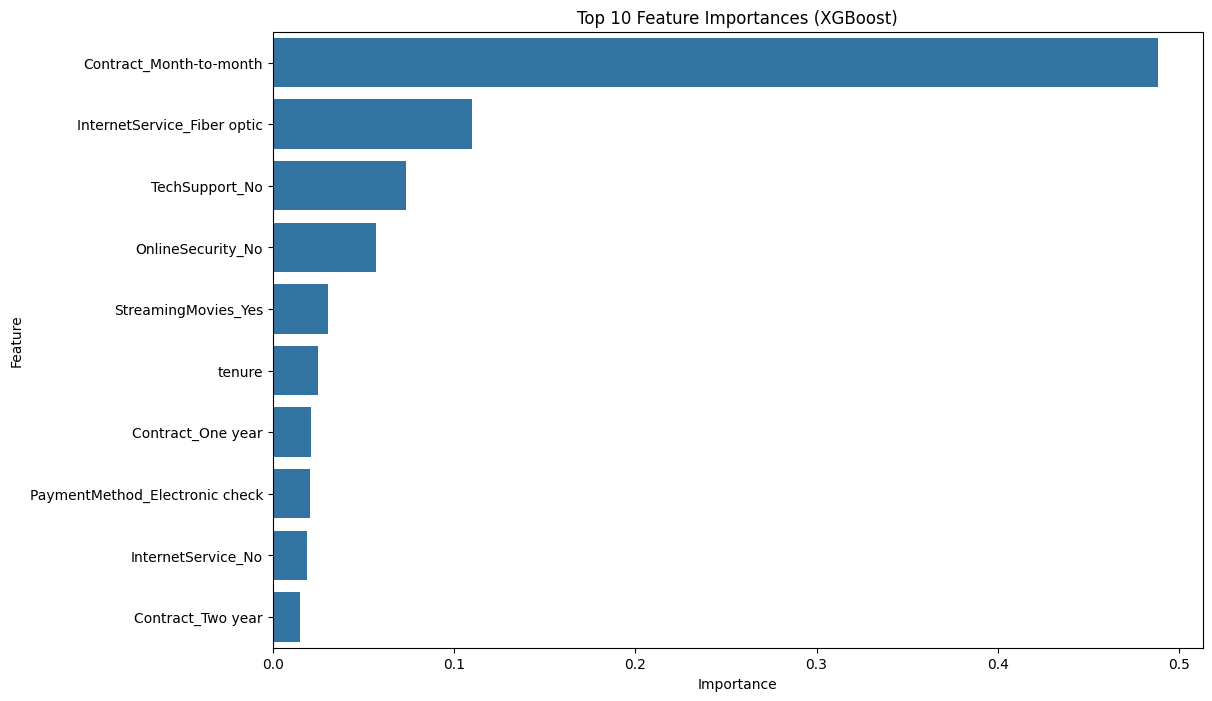

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming the dataset (df) is already loaded and preprocessed
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn', 'customerID'])  # Drop target and non-informative columns
y = df['Churn']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Passthrough for numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # OneHotEncoder for categorical features
    ])

# Apply the preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after OneHotEncoding
feature_names = numerical_features + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame with the processed data and feature names
X_processed_df = pd.DataFrame(X_processed, columns=feature_names, index=X.index)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model to training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions and evaluate the model
y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Feature importance
feature_importance = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})  # Use feature_names here
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nTop Features:\n", feature_importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

#

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Deep Learning**

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [ ]:
pd.get_dummies(df,columns=["gender"],drop_first=True)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,7590-VHVEG,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,0,False
1,5575-GNVDE,0,No,No,0.066327,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,0,True
2,3668-QPYBK,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,1,True
3,7795-CFOCW,0,No,No,0.514251,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,0,True
4,9237-HQITU,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,-0.340876,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,0.665992,-0.129281,0,True
7039,2234-XADUH,0,Yes,Yes,1.613701,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),1.277533,2.242808,0,False
7040,4801-JZAZL,0,Yes,Yes,-0.870241,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,-1.168632,-0.855182,0,False
7041,8361-LTMKD,1,Yes,No,-1.155283,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,0.320338,-0.872777,1,True


In [ ]:
print("Class distribution in original dataset:\n", y.value_counts())


Class distribution in original dataset:
 Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data into DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data

# Assuming 'Churn' is your target variable
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']

# One-Hot Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

# Standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


In [ ]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))  # Adjusted input dimension
model.add(Dense(6, activation='relu'))
# model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │         141,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,593 (553.10 KB)

 Trainable params: 141,593 (553.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=12, validation_split=0.25)

Epoch 1/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4669 - loss: 0.8026 - val_accuracy: 0.5919 - val_loss: 0.6611
Epoch 2/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7575 - loss: 0.8055 - val_accuracy: 0.6693 - val_loss: 0.5647
Epoch 3/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8439 - loss: 0.3170 - val_accuracy: 0.6764 - val_loss: 0.5635
Epoch 4/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8890 - loss: 0.2153 - val_accuracy: 0.6764 - val_loss: 0.5688
Epoch 5/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9332 - loss: 0.1494 - val_accuracy: 0.6707 - val_loss: 0.5887
Epoch 6/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9537 - loss: 0.1076 - val_accuracy: 0.6629 - val_loss: 0.6144
Epoch 7/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9775 - loss: 0.0709 - val_accuracy: 0.6593 - val_loss: 0.6374
Epoch 8/12
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9842 - loss: 0.0499 - val_accuracy:

In [ ]:
y_log=model.predict(X_test)
y_pred=np.where(y_log>0.4,1,0)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7551454932576295
[[1056    5]
 [ 340    8]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1061
           1       0.62      0.02      0.04       348

    accuracy                           0.76      1409
   macro avg       0.69      0.51      0.45      1409
weighted avg       0.72      0.76      0.66      1409



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Model architecture
model = Sequential([
    Dense(20, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(6, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Allow for more epochs
    validation_split=0.25,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5286 - loss: 1.4340 - val_accuracy: 0.4656 - val_loss: 1.2066
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5857 - loss: 1.1445 - val_accuracy: 0.4684 - val_loss: 1.1070
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6261 - loss: 0.9990 - val_accuracy: 0.5025 - val_loss: 1.0096
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6730 - loss: 0.9115 - val_accuracy: 0.6118 - val_loss: 0.9418
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6930 - loss: 0.8502 - val_accuracy: 0.7204 - val_loss: 0.9073
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7156 - loss: 0.8152 - val_accuracy: 0.7395 - val_loss: 0.8959
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7209 - loss: 0.7804 - val_accuracy: 0.7324 - val_loss: 0.8806
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7580 - loss: 0.7295 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Adjust the threshold
threshold = 0.5  # You can experiment with different thresholds
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_adjusted)
print("\nClassification Report:\n", class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Return the metrics as a dictionary (optional)
evaluation_results = {
    "confusion_matrix": conf_matrix,
    "classification_report": class_report,
    "roc_auc_score": roc_auc
}


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
 [[1039   22]
 [ 275   73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      1061
           1       0.77      0.21      0.33       348

    accuracy                           0.79      1409
   macro avg       0.78      0.59      0.60      1409
weighted avg       0.79      0.79      0.74      1409

ROC AUC Score: 0.8481927156120337


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Oversample the minority class using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build the model
model = Sequential([
    Dense(20, input_dim=X_train.shape[1], activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model with class weights
class_weight = {0: 1.0, 1: 3.0}  # Adjust weight for minority class
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    validation_split=0.25,
                    class_weight=class_weight,
                    verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test)[:, 0]  # Predicted probabilities
default_threshold = 0.5
new_threshold = 0.4

# Default threshold
y_pred_default = (y_pred_prob >= default_threshold).astype(int)
# Adjusted threshold
y_pred_adjusted = (y_pred_prob >= new_threshold).astype(int)

# Evaluate default threshold
print("Evaluation with Default Threshold (0.5):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Evaluate adjusted threshold
print("\nEvaluation with Adjusted Threshold (0.4):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5954 - loss: 1.1512 - val_accuracy: 0.7851 - val_loss: 0.5318
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8724 - loss: 0.5164 - val_accuracy: 0.9961 - val_loss: 0.0901
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9639 - loss: 0.1473 - val_accuracy: 0.9995 - val_loss: 0.0359
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9910 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9963 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9971 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9981 - loss: 0.0097 - val_accuracy: 1

In [ ]:
import pickle

# Save the trained XGBoost model (best_xgb)
filename = 'xgb_model.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))


In [ ]:
from google.colab import files

# Download the model
files.download('xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

# Load the dataset

# Select the essential features and the target variable
selected_features = [
    'Contract', 'tenure', 'InternetService', 'TotalCharges',
    'MonthlyCharges', 'OnlineSecurity', 'TechSupport', 'PaymentMethod'
]
target = 'Churn'

# Filter the dataset
df = df[selected_features + [target]]

# Handle missing values
df.dropna(inplace=True)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=[
    'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'PaymentMethod'
], drop_first=True)

# Split the dataset into training and testing sets
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the retrained model
with open('xgb_model_retrained.pkl', 'wb') as f:
    pickle.dump(model, f)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
from google.colab import files

# Replace 'xgb_model_retrained.pkl' with the file you want to download
files.download('xgb_model_retrained.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>